In [2]:
# 美国2012年总统候选人政治献金数据分析

In [3]:
导入包

NameError: name '导入包' is not defined

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

In [ ]:
方便大家操作，将月份和参选人以及所在政党进行定义

In [3]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [ ]:
读取文件

In [4]:
usa_election = pd.read_table('./usa_election.txt',sep=',',low_memory=False)

In [ ]:
查看文件样式以及基本信息

In [5]:
usa_election.shape
usa_election.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [ ]:
【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [7]:
usa_election['party'] = usa_election['cand_nm'].map(parties)
usa_election.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,727647190,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,852106725,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,857498865,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [ ]:
查看单独一行，是否加上了'party'一列

In [120]:
usa_election['party'].isnull().any()

False

In [ ]:
使用np.unique()函数查看colums：party这一列中有哪些元素

In [24]:
np.unique(usa_election['party'])
# usa_election['party'].unique()

array(['Democrat', 'Libertarian', 'Reform', 'Republican'], dtype=object)

In [ ]:
使用value_counts()函数，统计party列中各个元素出现次数

In [27]:
pd.value_counts(usa_election['party'])
# usa_election['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

In [ ]:
【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [121]:
usa_election.groupby('party').groups
# type(usa_election)
usa_election.groupby('party')['contb_receipt_amt'].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

In [ ]:
查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [9]:
usa_election.groupby(['party','contb_receipt_dt'])['contb_receipt_amt'].sum()

party       contb_receipt_dt
Democrat    01-AUG-11            175281.00
            01-DEC-11            651532.82
            01-JAN-12             58098.80
            01-JUL-11            165961.00
            01-JUN-11            145459.00
            01-MAY-11             82644.00
            01-NOV-11            122529.87
            01-OCT-11            148977.00
            01-SEP-11            403297.62
            02-AUG-11            164510.11
            02-DEC-11            216056.96
            02-JAN-12             89743.60
            02-JUL-11             17105.00
            02-JUN-11            422453.00
            02-MAY-11            396675.00
            02-NOV-11            147183.81
            02-OCT-11             62605.62
            02-SEP-11            137948.41
            03-AUG-11            147053.02
            03-DEC-11             81304.02
            03-JAN-12             87406.97
            03-JUL-11              5982.00
            03-JUN-11    

In [ ]:
查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [10]:
usa_election['contb_receipt_dt']
usa_election.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

In [13]:
#转换成字符串格式
# def convert2time(item):
#     day,month,year = item.split('-')
#     #根据key取值
#     mon = months[month] 
#     return '20'+year+'-'+str(mon)+'-'+'day'
#直接转成时间格式
def convert2time(item):
    return item.to_datetime()


usa_election['contb_receipt_dt'] = usa_election['contb_receipt_dt'].map(convert2time)
usa_election['contb_receipt_dt']

D:\Anaconda3\lib\site-packages\pandas\core\series.py:2354: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  new_values = map_f(values, arg)


0        2011-06-20
1        2011-06-23
2        2011-07-05
3        2011-08-01
4        2011-06-20
5        2011-06-23
6        2011-06-21
7        2011-07-05
8        2011-06-21
9        2011-06-20
10       2011-06-22
11       2011-06-22
12       2011-06-21
13       2011-06-17
14       2011-07-11
15       2011-07-08
16       2011-07-05
17       2011-06-27
18       2011-06-13
19       2011-06-16
20       2011-06-16
21       2011-06-16
22       2011-06-17
23       2011-06-17
24       2011-07-18
25       2011-07-18
26       2011-08-05
27       2011-07-01
28       2011-07-05
29       2011-07-05
            ...    
536011   2011-09-30
536012   2011-09-30
536013   2011-09-30
536014   2011-09-30
536015   2011-09-30
536016   2011-09-30
536017   2011-09-30
536018   2011-09-30
536019   2011-09-30
536020   2011-09-29
536021   2011-11-15
536022   2011-10-29
536023   2011-11-12
536024   2011-11-30
536025   2011-08-17
536026   2011-08-26
536027   2011-10-04
536028   2011-10-04
536029   2011-09-30


In [166]:
查看是否转换成功

NameError: name '查看是否转换成功' is not defined

In [ ]:
usa_election['contb_receipt_dt']
usa_election.dtypes

In [ ]:
将时间转换为时间数据类型
根据时间进行排序

In [282]:
#如果上面使用的是字符串转换，这里需要转换为时间类型
#usa_election['contb_receipt_dt'] = pd.to_datetime(usa_election['contb_receipt_dt'])
usa_election.sort_values(by='contb_receipt_dt')

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
478480,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475327,C00496067,P00003608,"Cain, Herman","STOLTENBERG, WAYNE",WESTLAKE,TX,762629076,CINCO RESOURCES,CFO,5200.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475328,C00496067,P00003608,"Cain, Herman","TRIBBLE, JAMES",HOUSTON,TX,770795026,NONE,RETIRED,1000.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
478481,C00496067,P00003608,"Cain, Herman","SIDNEY, SCOTT",CEDARBURG,WI,530122317,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
475329,C00496067,P00003608,"Cain, Herman","DAVIS, JEREMY S MR.",HOUSTON,TX,770252267,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
469861,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
469860,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
478476,C00496067,P00003608,"Cain, Herman","ANDINGF, AL",MONONA,WI,537162503,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463851,C00496067,P00003608,"Cain, Herman","MANN, KEITH",UNIVERSITY PARK,FL,342012269,US ARMY,SOLDIER,500.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463850,C00496067,P00003608,"Cain, Herman","COOPER, ROBERT",ORLANDO,FL,328264121,TEAM HEALTH,PHYSICIAN,250.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican


In [ ]:
得到转换后的，每天各政党所收政治献金数目。

考察知识点：groupby（多个字段）

In [15]:
usa_money_day = usa_election.groupby(['party','contb_receipt_dt',])['contb_receipt_amt'].sum()
usa_money_day

party       contb_receipt_dt
Democrat    2011-04-04           640235.12
            2011-04-05           307641.00
            2011-04-06           247542.59
            2011-04-07           252336.00
            2011-04-08           295452.00
            2011-04-09           105879.00
            2011-04-10           100373.00
            2011-04-11           360728.00
            2011-04-12           405160.46
            2011-04-13           382836.33
            2011-04-14           306643.50
            2011-04-15           408377.00
            2011-04-16            82658.00
            2011-04-17            70802.00
            2011-04-18           501971.37
            2011-04-19           304874.00
            2011-04-20           314540.11
            2011-04-21           315618.00
            2011-04-22           295464.45
            2011-04-23            34829.00
            2011-04-24            37100.00
            2011-04-25           447282.00
            2011-04-26   

In [ ]:
【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [16]:
# usa_money_day.unstack(level=0,fill_value=0)
usa_money_day_b = usa_money_day.unstack('party')
usa_money_day_b


party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01,NaN,NaN,NaN,8600.00
2011-01-03,NaN,NaN,NaN,4800.00
2011-01-04,NaN,NaN,NaN,5000.00
2011-01-12,NaN,NaN,NaN,4150.00
2011-01-13,NaN,NaN,NaN,4000.00
2011-01-14,NaN,NaN,NaN,6000.00
2011-01-15,NaN,NaN,NaN,500.00
2011-01-16,NaN,NaN,NaN,750.00
2011-01-17,NaN,NaN,NaN,500.00


In [ ]:
使用上面获取的数据
画出各党派累计政治献金,cumsum()累加函数

In [225]:
usa_money_day_b

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01 00:00:00,NaN,NaN,NaN,8.600000e+03
2011-01-03 00:00:00,NaN,NaN,NaN,4.800000e+03
2011-01-04 00:00:00,NaN,NaN,NaN,5.000000e+03
2011-01-12 00:00:00,NaN,NaN,NaN,4.150000e+03
2011-01-13 00:00:00,NaN,NaN,NaN,4.000000e+03
2011-01-14 00:00:00,NaN,NaN,NaN,6.000000e+03
2011-01-15 00:00:00,NaN,NaN,NaN,5.000000e+02
2011-01-16 00:00:00,NaN,NaN,NaN,7.500000e+02
2011-01-17 00:00:00,NaN,NaN,NaN,5.000000e+02


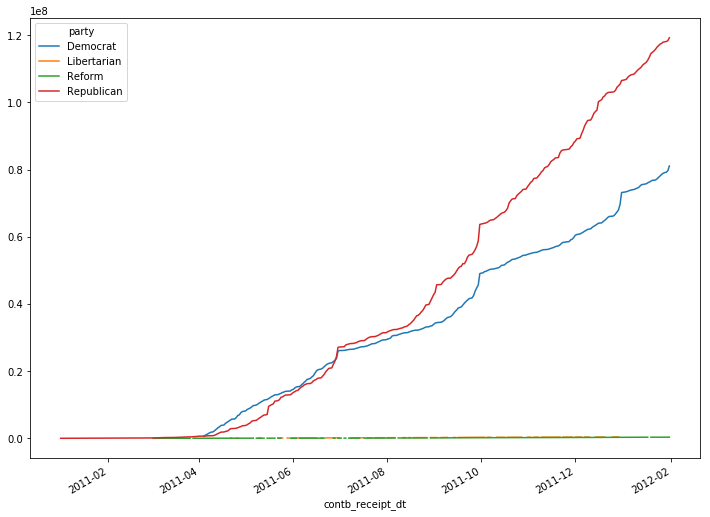

In [18]:
import matplotlib.pyplot as plt
axes = usa_money_day_b.cumsum().plot()
#得到画板
fig = axes.get_figure()
#设置图片的大小，英寸
fig.set_size_inches([12,9])

In [277]:
把时间作为列，党派作为行来观察,unstack('contb_receipt')

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
        2.0000000e+02,  4.1250000e+03,  4.5650000e+03,  2.0550000e+03,
        1.1200000e+03,  2.5750000e+03,  2.5350000e+03,  1.8350000e+03,
        1.2950000e+03,  1.1050000e+03,  4.0000000e+02,  3.2500000e+02,
        3.0000000e+02,  3.0000000e+02,  2.5500000e+02,  7.2000000e+02,
      

In [307]:
uu = usa_money_day_b.stack().unstack('contb_receipt_dt')
uu

contb_receipt_dt,2011-01-01 00:00:00,2011-01-03 00:00:00,2011-01-04 00:00:00,2011-01-12 00:00:00,2011-01-13 00:00:00,2011-01-14 00:00:00,2011-01-15 00:00:00,2011-01-16 00:00:00,2011-01-17 00:00:00,2011-01-18 00:00:00,...,2012-01-22 00:00:00,2012-01-23 00:00:00,2012-01-24 00:00:00,2012-01-25 00:00:00,2012-01-26 00:00:00,2012-01-27 00:00:00,2012-01-28 00:00:00,2012-01-29 00:00:00,2012-01-30 00:00:00,2012-01-31 00:00:00
party,,,,,,,,,,,,,,,,,,,,,
Democrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67194.23,337307.07,458909.23,438949.32,450268.94,305785.47,235492.85,93177.00,435921.72,1418410.31
Libertarian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,450.00,225.00,500.00,282.00,25.00,3176.37,175.00,200.00,130.00,150.00
Republican,8600.0,4800.0,5000.0,4150.0,4000.0,6000.0,500.0,750.0,500.0,4800.0,...,507168.71,645477.15,462233.66,416931.39,256406.86,368441.82,82775.80,75220.02,255204.80,869890.41


In [ ]:
使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [333]:
uu2 = uu.unstack()
uu2.fillna(0)

contb_receipt_dt  party      
2011-01-01        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        8600.00
2011-01-03        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        4800.00
2011-01-04        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        5000.00
2011-01-12        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        4150.00
2011-01-13        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        4000.00
2011-01-14        Democrat             0.00
                  Libertarian          0.00
  

In [ ]:
查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。
能看出各个候选人主要的支持者分布情况  

In [19]:
usa_election.fillna(0)
cand_occupation = usa_election.groupby(['cand_nm','contbr_occupation'])['contb_receipt_amt'].sum()
cand_occupation

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN              1869.50
                    100% DISABLED VIETNAM VETERAN       236.25
                    A/C AND HEAT                        250.00
                    ACADEMIC EMPLOYMENT SPECIALIST       25.00
                    ACCOUNT                              50.00
                    ACCOUNT ANALYST                     200.00
                    ACCOUNT EXECUTIVE                   100.00
                    ACCOUNT MANAGER                     230.00
                    ACCOUNTANT                        12979.00
                    ACCOUNTANT TRAINER                  250.00
                    ACCOUNTING                          350.00
                    ACCOUNTING MANAGER                   50.00
                    ACCOUNTING SPECIALIST               250.00
                    ACCOUNTING SUPERVISOR               125.00
                    ACCOUNTING/AUDITING                 700.00
    

In [ ]:
查看老兵主要支持谁：DISABLED VETERAN
多层索引

In [ ]:
cand_occupation[:,'DISABLED VETERAN']

In [ ]:
把索引编程列

In [22]:
cand_occupation2 = cand_occupation.reset_index()
cand_occupation2

,cand_nm,contbr_occupation,contb_receipt_amt
0,"Bachmann, Michelle",100% DISABLED VETERAN,1869.50
1,"Bachmann, Michelle",100% DISABLED VIETNAM VETERAN,236.25
2,"Bachmann, Michelle",A/C AND HEAT,250.00
3,"Bachmann, Michelle",ACADEMIC EMPLOYMENT SPECIALIST,25.00
4,"Bachmann, Michelle",ACCOUNT,50.00
5,"Bachmann, Michelle",ACCOUNT ANALYST,200.00
6,"Bachmann, Michelle",ACCOUNT EXECUTIVE,100.00
7,"Bachmann, Michelle",ACCOUNT MANAGER,230.00
8,"Bachmann, Michelle",ACCOUNTANT,12979.00
9,"Bachmann, Michelle",ACCOUNTANT TRAINER,250.00


In [ ]:
找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额

In [23]:
usa_election.groupby(['cand_nm'])['contb_receipt_amt'].max()

cand_nm
Bachmann, Michelle                   3022.00
Cain, Herman                        10000.00
Gingrich, Newt                       5100.00
Huntsman, Jon                        5000.00
Johnson, Gary Earl                   2500.00
McCotter, Thaddeus G                 4000.00
Obama, Barack                     1944042.43
Paul, Ron                            5000.00
Pawlenty, Timothy                   10000.00
Perry, Rick                         10000.00
Roemer, Charles E. 'Buddy' III        200.00
Romney, Mitt                        12700.00
Santorum, Rick                       5000.00
Name: contb_receipt_amt, dtype: float64

In [24]:
usa_election.query('cand_nm=="Obama, Barack" & contb_receipt_amt == 1944042.43')

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
176127,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,2011-12-31,NaN,X,*,SA18,763233,Democrat


party       contb_receipt_dt   
Democrat    2011-01-01 00:00:00             NaN
            2011-01-03 00:00:00             NaN
            2011-01-04 00:00:00             NaN
            2011-01-12 00:00:00             NaN
            2011-01-13 00:00:00             NaN
            2011-01-14 00:00:00             NaN
            2011-01-15 00:00:00             NaN
            2011-01-16 00:00:00             NaN
            2011-01-17 00:00:00             NaN
            2011-01-18 00:00:00             NaN
            2011-01-20 00:00:00             NaN
            2011-01-21 00:00:00             NaN
            2011-01-22 00:00:00             NaN
            2011-01-24 00:00:00             NaN
            2011-01-26 00:00:00             NaN
            2011-01-27 00:00:00             NaN
            2011-01-28 00:00:00             NaN
            2011-01-29 00:00:00             NaN
            2011-01-31 00:00:00             NaN
            2011-02-01 00:00:00             NaN
        